In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-09-30,0.239144
2023-12-31,1.166981
2024-03-31,1.172372
2024-06-30,-0.214586


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-03-31,8.448607
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2023-12-31,8.679346
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.763788
2014-09-30,4.445903
2014-12-31,0.341941
2015-03-31,2.981396
2015-06-30,10.861409
2015-09-30,2.101863
2015-12-31,-0.955240
2016-03-31,0.426535
2016-06-30,7.905282
2016-09-30,1.055159


In [8]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.961426
1999-09-30,-0.081735
1999-12-31,2.497882
2000-03-31,3.497321
2000-06-30,-0.165239
...,...
2023-12-31,-0.295617
2024-03-31,0.847376
2024-06-30,0.521898
2024-09-30,0.926751


In [9]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [10]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [11]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2023-12-31,51.281538
2024-03-31,56.011538
2024-06-30,64.856923
2024-09-30,60.701538


In [12]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2023-12-31,38.312308
2024-03-31,45.396154
2024-06-30,55.676923
2024-09-30,54.311538


In [13]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2023-12-31,47.333077
2024-03-31,53.394615
2024-06-30,63.980000
2024-09-30,59.335385


In [14]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2023-12-31,-1.252183
2024-03-31,2.997446
2024-06-30,-4.063438
2024-09-30,-1.257083


In [15]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2023-12-31,9.904875
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.936994


In [16]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2023-12-31,10.134204
2024-03-31,8.359733
2024-06-30,7.890231
2024-09-30,10.962496


In [17]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2023-12-31,13.161442
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692


In [18]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2023-12-31,8.572045
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864


In [19]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2023-12-31,-0.635728
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893


In [20]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [21]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))
kko=kko.pct_change()*100
kko=kko.dropna()
kko

,KKO
2007-06-30,1.882931
2007-09-30,-1.366010
2007-12-31,-0.407332
2008-03-31,-0.899796
2008-06-30,0.371440
...,...
2023-12-31,0.915033
2024-03-31,-0.431779
2024-06-30,-0.346921
2024-09-30,-1.000870


In [22]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.400000
2014-06-30,9.700000
2014-09-30,10.066667
2014-12-31,10.400000
2015-03-31,10.566667
2015-06-30,10.300000
2015-09-30,10.133333
2015-12-31,10.266667
2016-03-31,10.166667
2016-06-30,10.366667


In [23]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2023-12-31,2.650705
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843


In [24]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [25]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,6.564246
2016-06-30,-1.441678
2016-09-30,-3.125000
2016-12-31,-1.921757
2017-03-31,2.379286
2017-06-30,3.007519
2017-09-30,6.104844
2017-12-31,1.563477
2018-03-31,-1.108374
2018-06-30,1.556663


In [26]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2024-12-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(0)
#data["İşsizlik"].iloc[-1]=8.8
data=data.astype(float)
data=data.dropna()
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.172265,12.387354,10.366667,7.905282,3.679217,2.954271,2.858421,9.655385,...,2.176211,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-1.441678
2016-09-30,-2.867673,-11.986557,-0.730868,-11.706412,11.266667,1.055159,2.393532,3.287543,3.173361,9.039286,...,0.777703,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-3.125000
2016-12-31,5.509612,18.585843,0.909485,10.443895,11.733333,0.564865,7.431690,5.087110,4.898119,8.851538,...,1.838075,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,-1.921757
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.778078,5.128144,4.833735,4.709149,8.805385,...,1.372056,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,2.379286
2017-06-30,2.280319,4.684057,1.416309,13.467062,11.233333,9.027657,5.390604,4.335505,4.227601,10.147692,...,1.080917,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,3.007519
2017-09-30,1.515919,-4.403850,-0.507829,5.743089,10.466667,6.161197,3.331476,3.046696,3.148272,10.856923,...,2.459291,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,6.104844
2017-12-31,1.882761,12.045111,1.190983,6.168259,10.100000,1.363470,6.523372,4.880301,5.005775,11.167692,...,0.942032,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,1.563477
2018-03-31,1.267288,-2.255476,-0.546448,-2.529621,9.933333,0.835828,3.350712,1.892066,2.053103,11.386923,...,0.791129,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,-1.108374
2018-06-30,0.588499,0.252231,-1.098901,-0.590437,10.500000,10.634017,8.472543,8.311555,8.300886,12.697692,...,-0.236475,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,1.556663
2018-09-30,-0.961150,-0.943565,-1.581197,-16.392345,11.166667,7.885191,10.581760,11.410152,10.947282,17.533077,...,-0.925885,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-12.875536


In [27]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.402473,0.042102,1.062027,-0.494257,-0.251994,-0.602031,-0.939986,-1.003157,-0.737706,-0.754294,...,-0.099585,-0.044564,-0.929759,0.274589,-0.810376,-1.014665,-0.228517,0.749899,-0.207280,0.077998
1,-1.393136,-0.188139,-1.454718,0.058492,-0.859800,-0.830808,-0.876992,-0.943204,-0.783862,-0.795865,...,-0.046936,-0.503368,-0.889144,0.353317,-0.901966,-0.577406,-0.073891,-0.926501,-0.457061,-1.103105
2,1.577243,0.230046,0.859021,0.345102,-0.903303,0.065690,-0.536843,-0.614876,-0.797927,-0.808783,...,0.082014,0.469663,-0.749995,-0.379853,-0.611455,0.331626,0.012988,1.072125,-0.278517,1.198698
3,-0.437524,-0.001814,-0.392074,0.467935,-0.795656,-0.344207,-0.584735,-0.650848,-0.801385,-0.786441,...,-0.170803,0.079991,-0.364878,-0.482749,-0.038223,0.534888,-0.634324,0.301241,0.359695,0.060957
4,0.226561,0.359254,1.174810,0.038020,-0.152407,-0.297504,-0.678909,-0.742517,-0.700824,-0.683530,...,0.219129,0.373756,-0.732178,0.950591,-0.760710,-1.158537,0.656256,-0.543310,0.452916,0.311394
5,-0.656409,-0.131278,0.367992,-0.432840,-0.406745,-0.663909,-0.922516,-0.947980,-0.647692,-0.656893,...,0.310757,0.181288,-1.032696,0.025363,-0.843132,-1.021208,0.125582,1.162888,0.912514,0.101362
6,0.941753,0.301810,0.412404,-0.658034,-0.832444,-0.095938,-0.575933,-0.594382,-0.624410,-0.636826,...,0.044220,0.387725,-0.484537,-0.906570,-0.539450,0.034823,0.032316,-0.089575,0.238641,0.202159
7,-0.447675,-0.141123,-0.496145,-0.760395,-0.879261,-0.660486,-1.140760,-1.156460,-0.607986,-0.613625,...,-0.031782,-0.235630,-0.675203,0.950306,-0.420742,-0.783404,0.000095,-0.103938,-0.157823,0.033047
8,-0.204030,-0.281963,-0.293585,-0.412368,-0.009876,0.250901,0.072632,0.032883,-0.509789,-0.536897,...,-0.578408,-0.306983,-0.340666,-0.234752,0.000622,0.747864,-0.470011,-0.161608,0.237630,-0.153462
9,-0.320212,-0.404918,-1.944193,-0.002925,-0.253777,0.626219,0.658320,0.536658,-0.147542,-0.197886,...,-1.079620,-0.370191,-0.039169,-0.713335,0.688819,2.180793,-0.852821,-0.126313,-1.903899,-0.579255


In [28]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [29]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']


def objective(trial):
    features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
    selected_features = []
    for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
    y_train,y_test=y[:-10],y[-10:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu','exponential'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])

    return mse  # Return validation accuracy as the objective

In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

In [30]:
selected_features=["KKO","İthalat","Kart","Kredi","M3","Mevduat Faiz 3Ay","Reel Güven","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL","Normal Sipariş"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
hata=[]
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=3,activation='tanh',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.506415880470929)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.020619742745416857)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=28,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [31]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=3,activation='tanh',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.506415880470929)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.020619742745416857)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=28,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [32]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Büyüme
2022-09-30,0.129495
2022-12-31,1.305274
2023-03-31,0.763768
2023-06-30,3.707262
2023-09-30,0.343998
2023-12-31,0.235448
2024-03-31,1.810135
2024-06-30,0.172309
2024-09-30,-0.307916
2024-12-31,1.193876


In [33]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.129495
2022-12-31,1.148543,1.305274
2023-03-31,0.101158,0.763768
2023-06-30,3.998077,3.707262
2023-09-30,0.239144,0.343998
2023-12-31,1.166981,0.235448
2024-03-31,1.172372,1.810135
2024-06-30,-0.214586,0.172309
2024-09-30,-0.203679,-0.307916
2024-12-31,0.000000,1.193876


In [34]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.24050724679737734

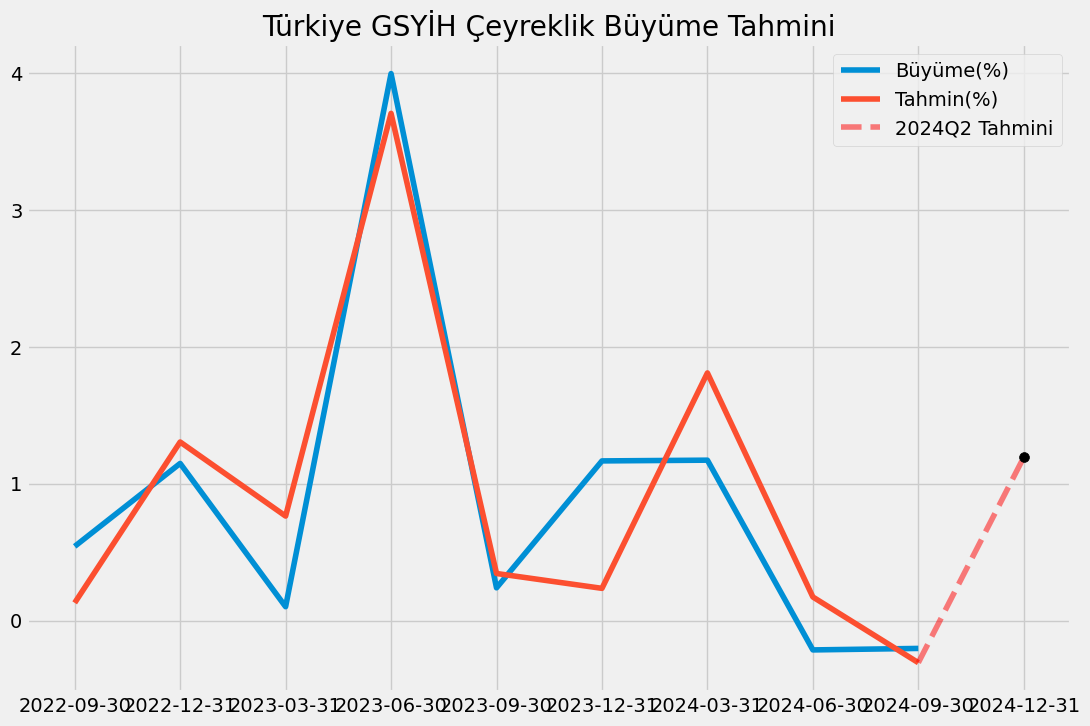

In [35]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [36]:
selected_features=["KKO","İthalat","İşsizlik","Kart","M2","M3","Ticari Faiz","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
    model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.010307800249683127)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=64,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [37]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.010307800249683127)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=64,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [38]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Büyüme
2022-09-30,0.155435
2022-12-31,1.149100
2023-03-31,0.353026
2023-06-30,3.185909
2023-09-30,0.180376
2023-12-31,-0.082568
2024-03-31,1.723279
2024-06-30,-0.237497
2024-09-30,-0.425495
2024-12-31,0.758696


In [39]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2

,Büyüme,Tahmin
2022-09-30,0.542207,0.155435
2022-12-31,1.148543,1.149100
2023-03-31,0.101158,0.353026
2023-06-30,3.998077,3.185909
2023-09-30,0.239144,0.180376
2023-12-31,1.166981,-0.082568
2024-03-31,1.172372,1.723279
2024-06-30,-0.214586,-0.237497
2024-09-30,-0.203679,-0.425495
2024-12-31,0.000000,0.758696


In [40]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.31007796732880144

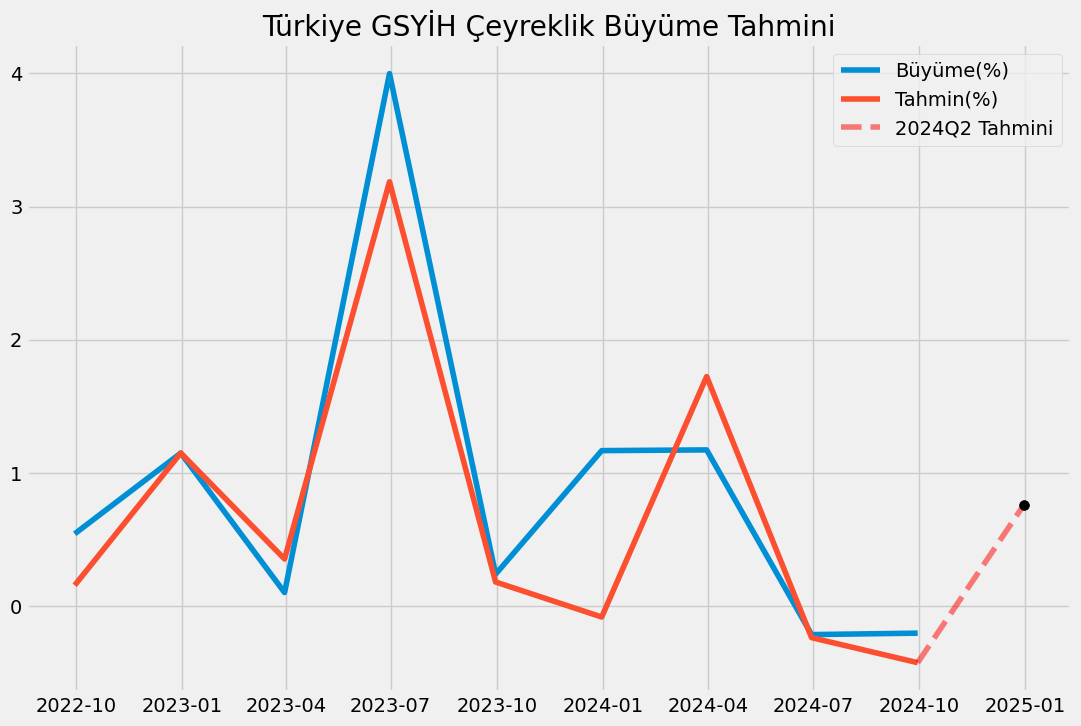

In [41]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler2["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler2["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler2["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler2.index[-1],y=tahminler2["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [42]:
selected_features=["KKO","İthalat","İşsizlik","Kart","M3","Mevduat Faiz 3Ay","Sanayi","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━

In [43]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [44]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,0.990012,0.256097,3.904774
1,1.272910,0.310329,3.222389
2,-1.114245,2.588549,0.386317
3,0.998972,0.269321,3.713048
4,1.025026,0.263178,3.799709
5,1.254575,0.248522,4.023783
6,0.831351,0.320491,3.120208
7,1.583746,0.298584,3.349139
8,1.044925,0.277140,3.608289
9,2.161638,0.552681,1.809363


In [45]:
predictions=predictions[predictions["Hata"]<0.5]

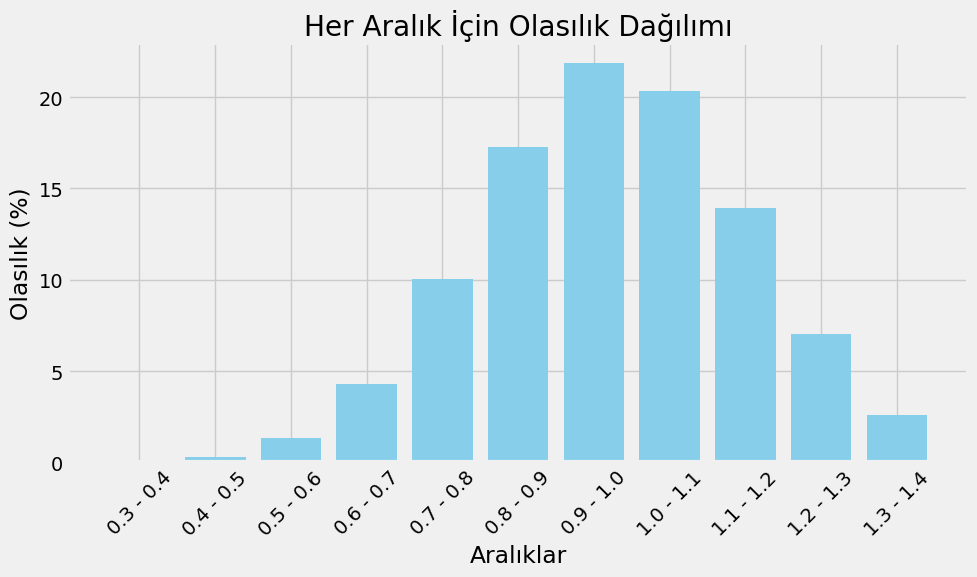

In [46]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0.3
bitis =  1.5

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [47]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.85]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%70 olasılıkla tahminler 0.79 ile 1.16 arasındadır.


In [48]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Büyüme
2022-09-30,0.199353
2022-12-31,1.323416
2023-03-31,0.771842
2023-06-30,3.886695
2023-09-30,0.647374
2023-12-31,0.345510
2024-03-31,2.223871
2024-06-30,-0.129185
2024-09-30,-0.244109
2024-12-31,0.885920


In [49]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3

,Büyüme,Tahmin
2022-09-30,0.542207,0.199353
2022-12-31,1.148543,1.323416
2023-03-31,0.101158,0.771842
2023-06-30,3.998077,3.886695
2023-09-30,0.239144,0.647374
2023-12-31,1.166981,0.345510
2024-03-31,1.172372,2.223871
2024-06-30,-0.214586,-0.129185
2024-09-30,-0.203679,-0.244109
2024-12-31,0.000000,0.885920


In [50]:
mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1])

0.28515539001406953

In [51]:

tahminler3.index=pd.to_datetime(tahminler3.index)
tahminler2.index=pd.to_datetime(tahminler2.index)
tahminler1.index=pd.to_datetime(tahminler1.index)

In [52]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.129495,0.155435,0.199353,0.161428,0.542207
2022-12-31,1.305274,1.149100,1.323416,1.259263,1.148543
2023-03-31,0.763768,0.353026,0.771842,0.629546,0.101158
2023-06-30,3.707262,3.185909,3.886695,3.593288,3.998077
2023-09-30,0.343998,0.180376,0.647374,0.390583,0.239144
2023-12-31,0.235448,-0.082568,0.345510,0.166130,1.166981
2024-03-31,1.810135,1.723279,2.223871,1.919095,1.172372
2024-06-30,0.172309,-0.237497,-0.129185,-0.064791,-0.214586
2024-09-30,-0.307916,-0.425495,-0.244109,-0.325840,-0.203679
2024-12-31,1.193876,0.758696,0.885920,0.946164,0.000000


In [53]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-03 tarihli tahmin başarıyla eklendi.


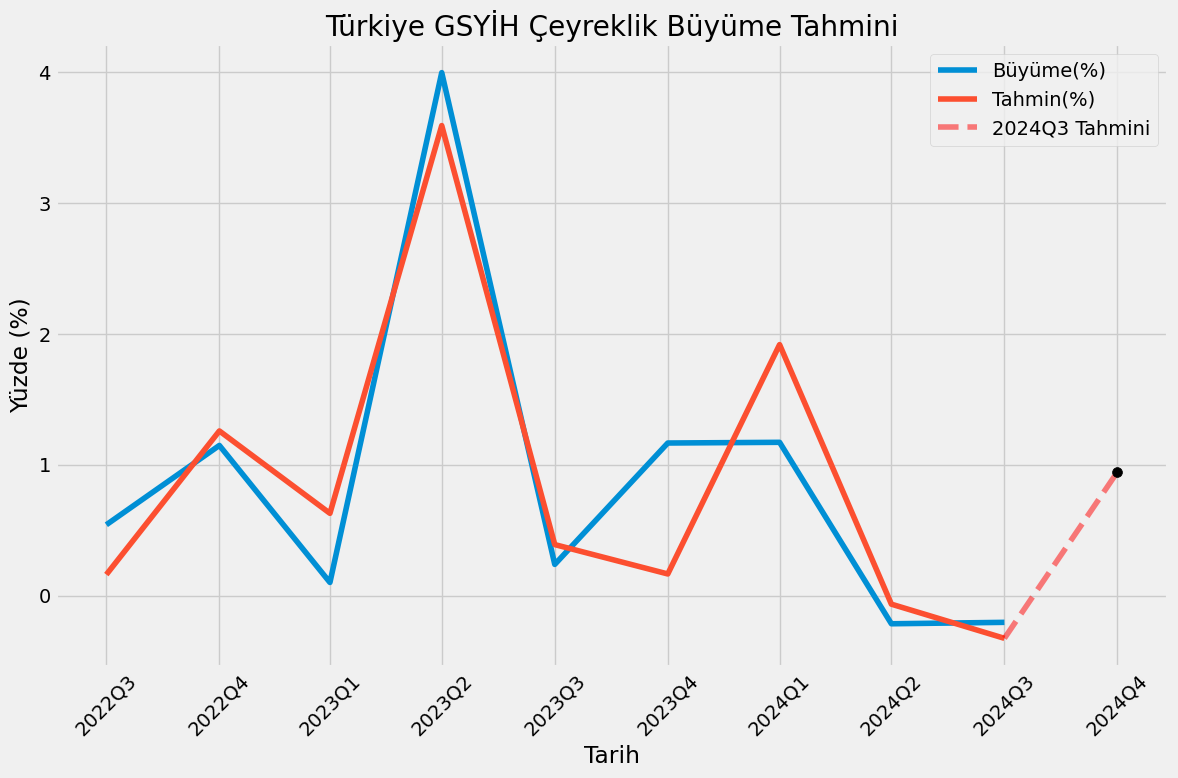

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [55]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [56]:


veri.loc[pd.to_datetime("2024-12-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [57]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [58]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [59]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [60]:
veri.to_csv("yıllık.csv")

In [61]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-03 tarihli tahmin başarıyla eklendi.


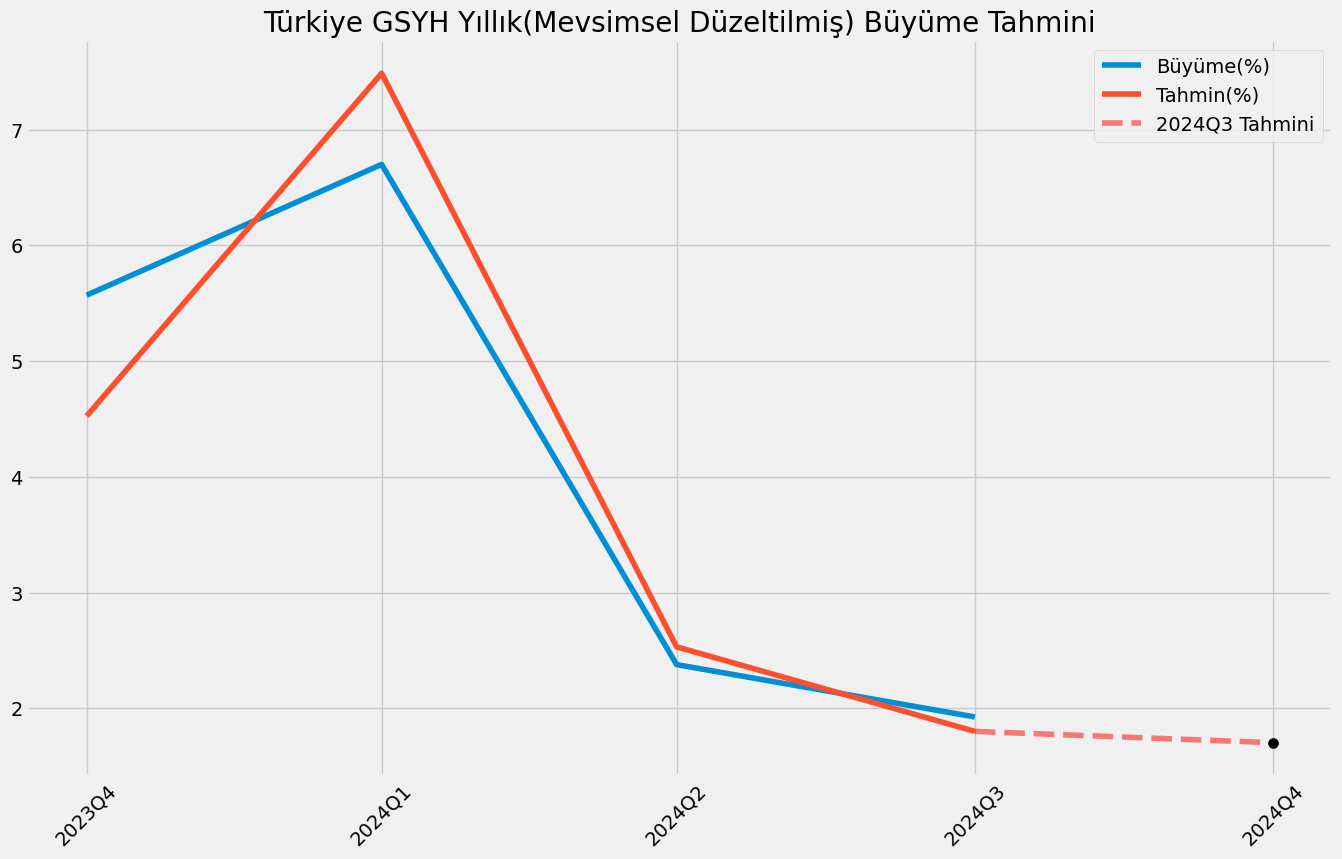

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





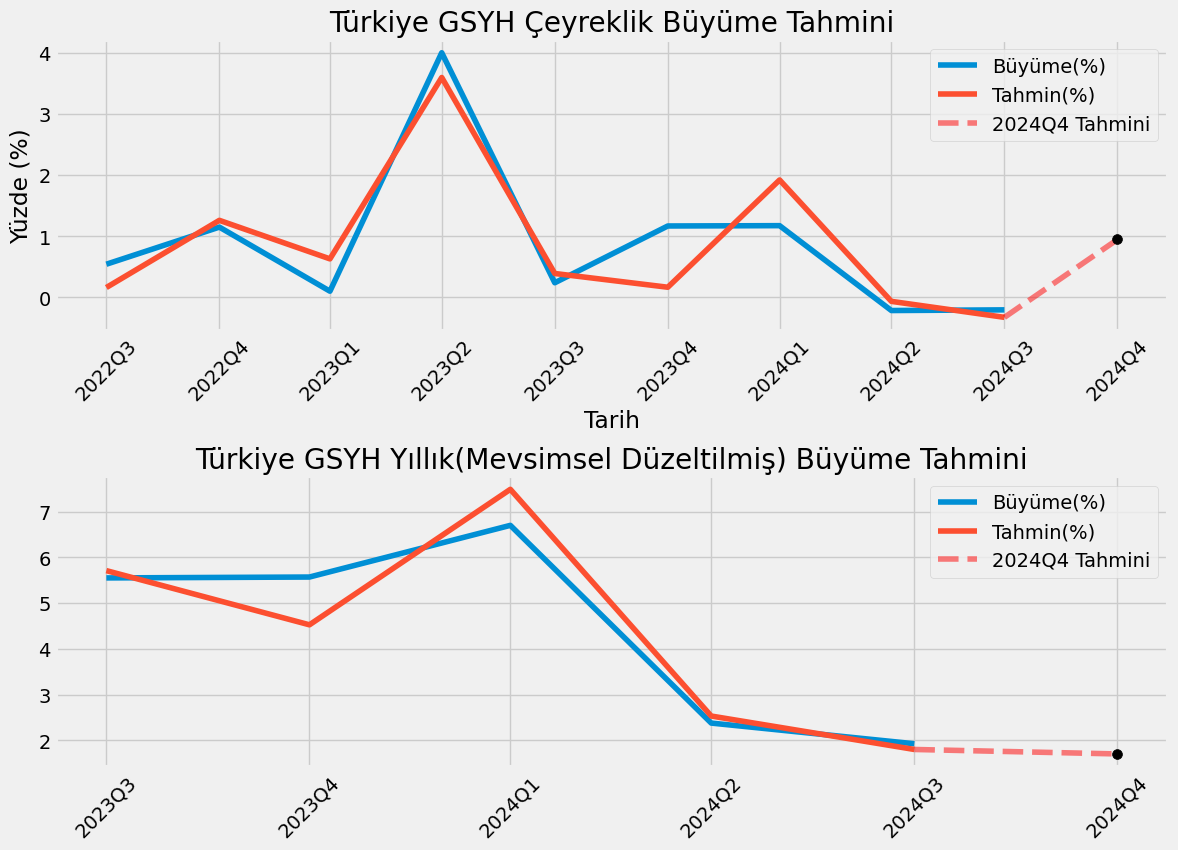

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [64]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.
